In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

## **Data Exploration**

In [2]:
df = pd.read_excel('City Power Consumption.xlsx')

In [3]:
# Convert and save to CSV
df.to_csv('City Power Consumption', index=False)

In [4]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [5]:
df.tail()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
52578,52579,NaN,75.6,0.094,436.2,38.96,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.6,37.73,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.4,37.49,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.0,37.37,152.0,0,33988.86076
52582,52583,NaN,66.24,0.088,485.7,36.72,155.0,0,34158.98734


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [7]:
df.shape

(52583, 9)

In [8]:
df.describe()

,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [9]:
df.dtypes

,0
S no,int64
Temperature,object
Humidity,object
Wind Speed,float64
general diffuse flows,float64
diffuse flows,float64
Air Quality Index (PM),float64
Cloudiness,int64
Power Consumption in A Zone,float64


In [10]:
for col in df.columns:
  count_values = df[col].value_counts()
  print(f'Column called \033[91m{col}\033[0m has \033[94m{len(count_values)}\033[0m unique values')

Column called S no has 52583 unique values
Column called Temperature has 3438 unique values
Column called Humidity has 4444 unique values
Column called Wind Speed has 548 unique values
Column called general diffuse flows has 10497 unique values
Column called diffuse flows has 10449 unique values
Column called Air Quality Index (PM) has 10 unique values
Column called Cloudiness has 2 unique values
Column called  Power Consumption in A Zone has 27760 unique values


## **Data Preprocessing**

In [11]:
df.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0


In [12]:
# Total number of duplicate rows in your dataset and count duplicates
value = len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ", value)
duplicates = df[df.duplicated()]

The number of duplicate values in the data set is =  0


In [13]:
# Check for NaN values
nan_values = df.isnull()
print(nan_values)

        S no  Temperature  Humidity  Wind Speed  general diffuse flows  \
0      False        False     False       False                  False   
1      False        False     False       False                  False   
2      False        False     False       False                  False   
3      False        False     False       False                  False   
4      False        False     False       False                  False   
...      ...          ...       ...         ...                    ...   
52578  False         True     False       False                  False   
52579  False         True     False       False                  False   
52580  False         True     False       False                  False   
52581  False         True     False       False                  False   
52582  False         True     False       False                  False   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
0              False                   False       

### Handling Missing values

In [14]:
# Convert 'Temperature' column to numeric, handling errors by coercing them to NaN
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Now fill NaN values with the mean of the 'Temperature' column
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)

<ipython-input-14-033d8aaff5d6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)


In [15]:
# Convert 'Humidity' column to numeric, handling errors
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

# Fill NaN values with the median of the valid numeric data
df['Humidity'].fillna(df['Humidity'].median(), inplace=True)

<ipython-input-15-a0898fb6d710>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humidity'].fillna(df['Humidity'].median(), inplace=True)


In [16]:
df['Wind Speed'].fillna(df['Wind Speed'].mean(), inplace=True)


<ipython-input-16-e32d0f48dcac>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Wind Speed'].fillna(df['Wind Speed'].mean(), inplace=True)


In [17]:
df['general diffuse flows'].fillna(df['general diffuse flows'].mean(), inplace=True)
df['diffuse flows'].fillna(df['diffuse flows'].mean(), inplace=True)

<ipython-input-17-8c81dea8a7bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['general diffuse flows'].fillna(df['general diffuse flows'].mean(), inplace=True)
<ipython-input-17-8c81dea8a7bc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [18]:
df['Air Quality Index (PM)'].fillna(df['Air Quality Index (PM)'].mean(), inplace=True)


<ipython-input-18-302f8a75a367>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Air Quality Index (PM)'].fillna(df['Air Quality Index (PM)'].mean(), inplace=True)


In [19]:
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df['Wind Speed'] = df['Wind Speed'].astype(float)
df['Cloudiness'] = df['Cloudiness'].astype(int)


In [20]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Temperature', 'Humidity', 'Wind Speed']]))
df = df[(z_scores < 3).all(axis=1)]  # Removing rows with z-scores greater than 3

In [21]:
outliers = df[(z_scores >= 3).any(axis=1)]

<ipython-input-21-2a84be3a867c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(z_scores >= 3).any(axis=1)]


In [22]:
print(outliers)

Empty DataFrame
Columns: [S no, Temperature, Humidity, Wind Speed, general diffuse flows, diffuse flows, Air Quality Index (PM), Cloudiness,  Power Consumption in A Zone]
Index: []


In [23]:
#If using Z-score, confirm that the threshold (commonly set at 3) is appropriate for your data. Try lowering the threshold to 2.5 or even 2 to check for less extreme outliers.

z_scores = np.abs(stats.zscore(df[['Temperature', 'Humidity', 'Wind Speed']]))
outliers = df[(z_scores > 2.5).any(axis=1)]
print(outliers)


        S no  Temperature  Humidity  Wind Speed  general diffuse flows  \
34        35        4.382     76.90       0.081                  0.073   
35        36        4.212     78.30       0.081                  0.117   
36        37        4.308     77.20       0.081                  0.062   
40        41        4.408     76.70       0.082                  0.037   
41        42        4.290     77.00       0.085                  0.033   
...      ...          ...       ...         ...                    ...   
49793  49794       19.520     30.41       0.084                  0.077   
49794  49795       19.460     30.47       0.086                  0.073   
49795  49796       19.330     29.87       0.082                  0.051   
49797  49798       19.270     30.07       0.086                  0.062   
49798  49799       19.240     29.11       0.082                  0.062   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
34             0.148                   152.0       

## **EDA and Data Visualization**

In [24]:
# Distribution of categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

In [25]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [26]:
# Boxplot for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

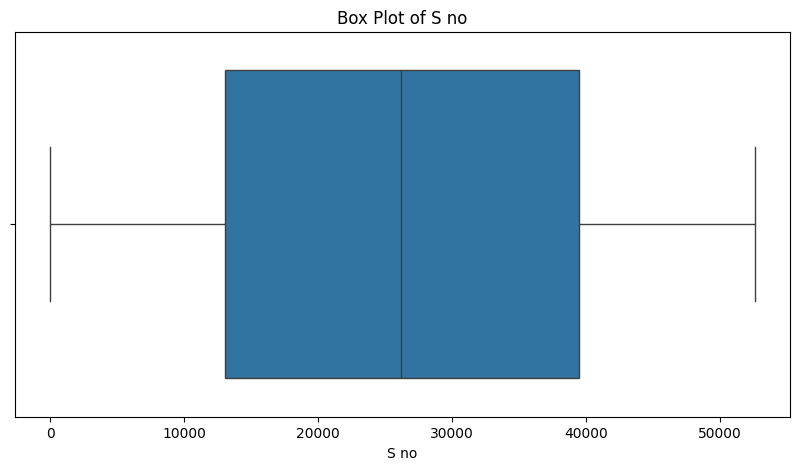

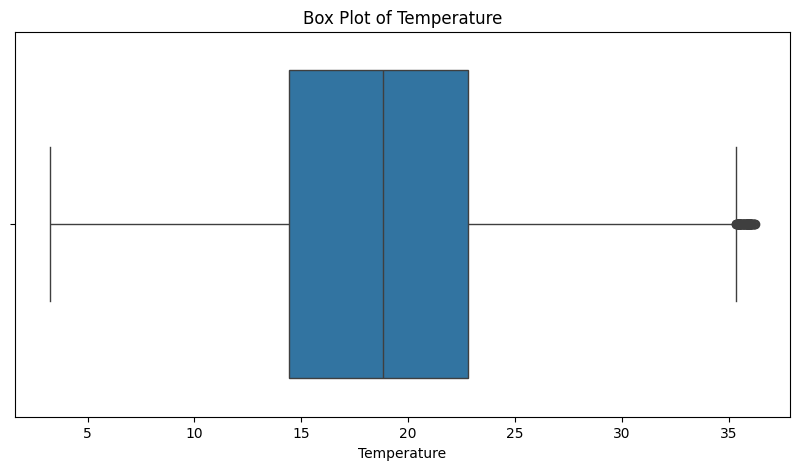

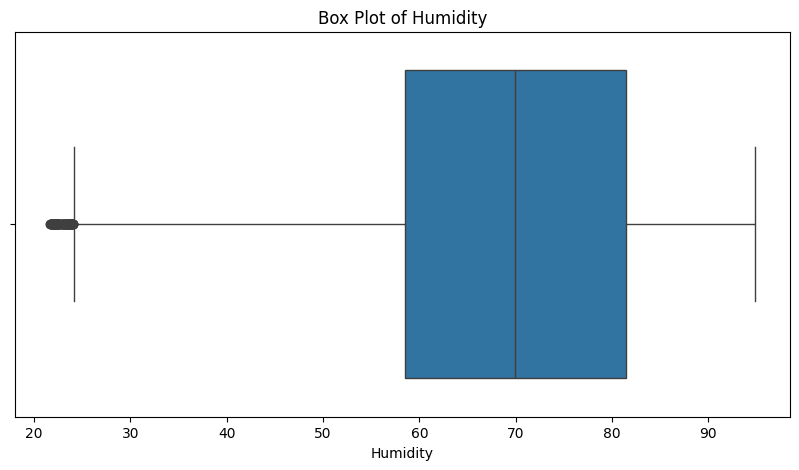

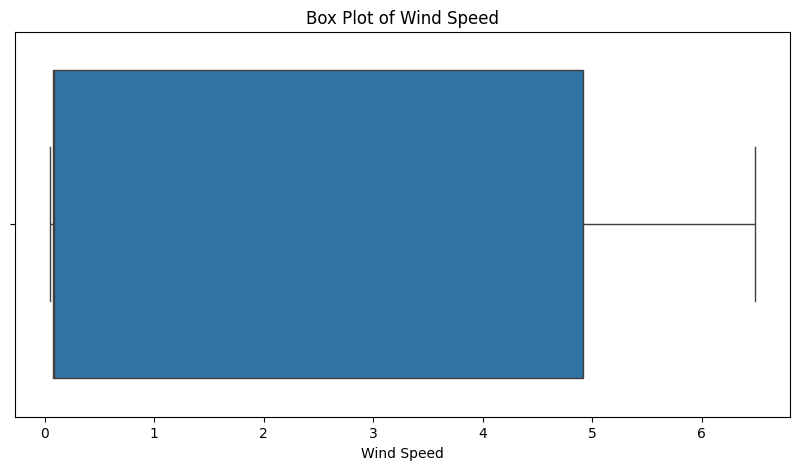

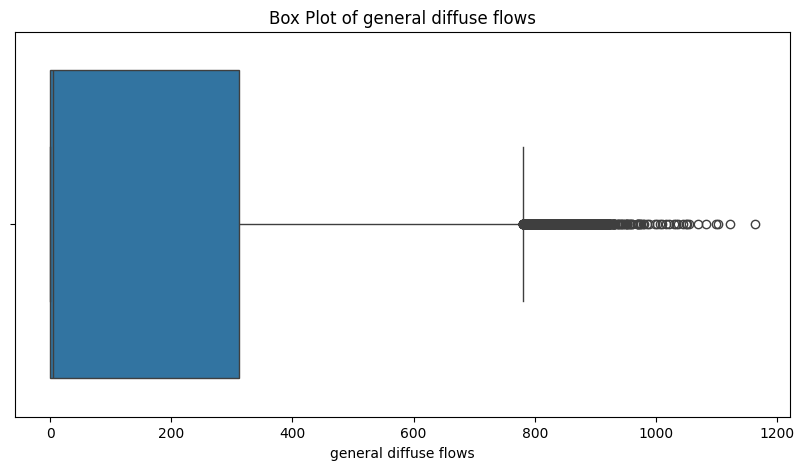

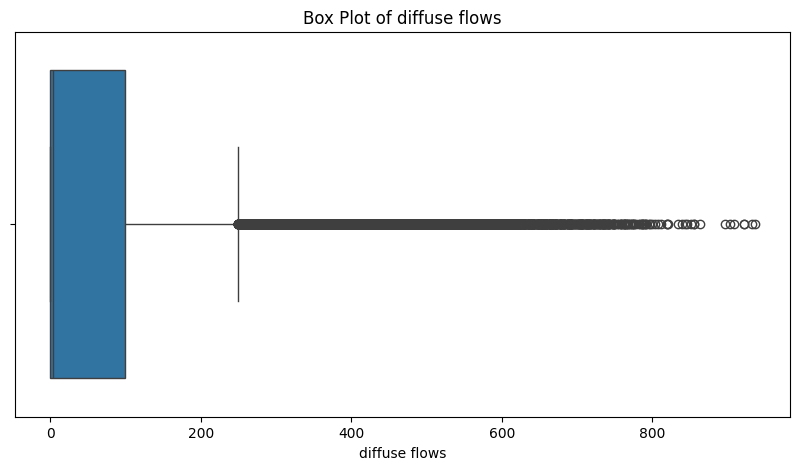

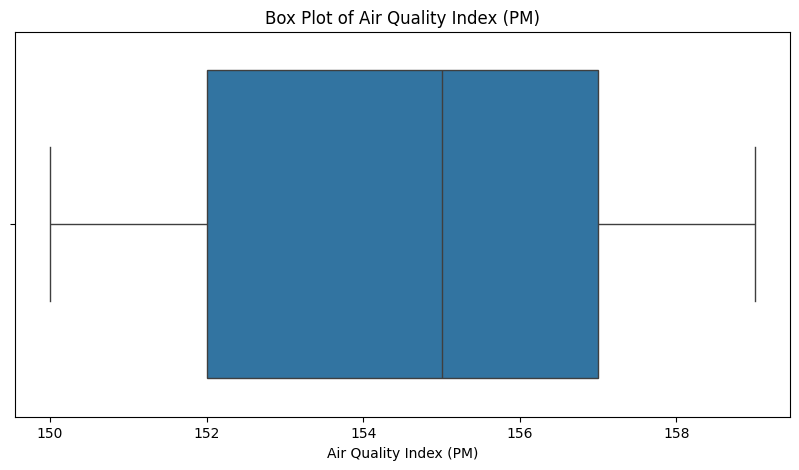

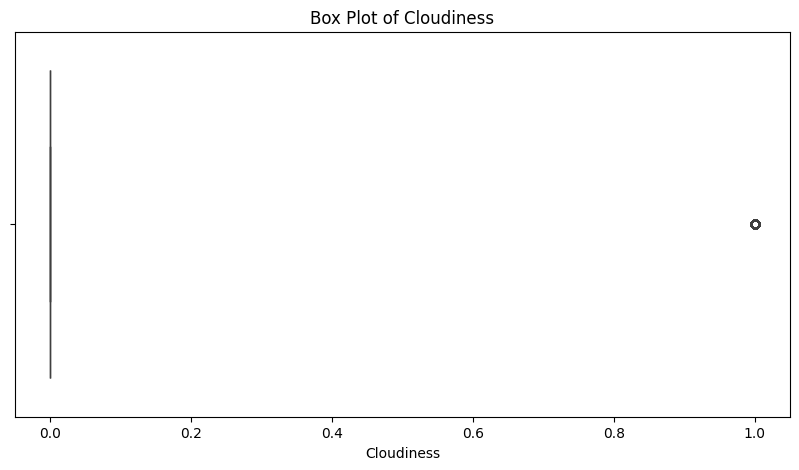

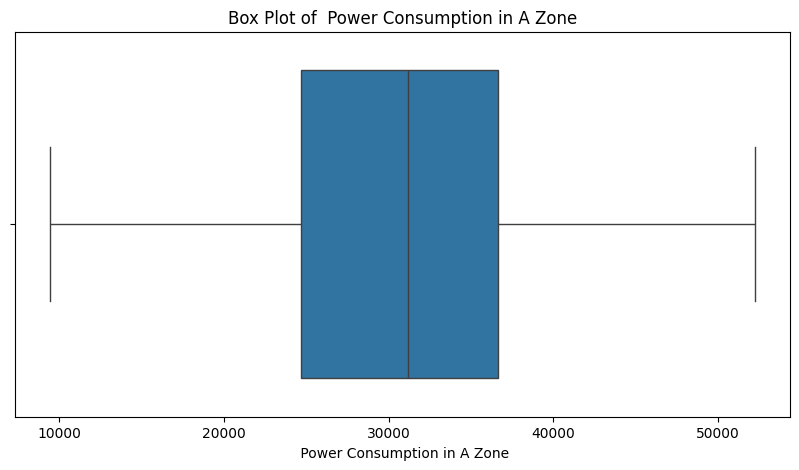

In [27]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## **Feature Engineering**

### Interaction between Temperature and Humidity if it makes sense for the problem

In [28]:
df['Temp_Humidity_Interaction'] = df['Temperature'] * df['Humidity']
df['Wind_Temp'] = df['Wind Speed'] * df['Temperature']



### Handling Temporal Features

In [29]:
print(df.columns)


Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone',
       'Temp_Humidity_Interaction', 'Wind_Temp'],
      dtype='object')


In [30]:
#Logarithmic Transformation
df['Air Quality Index (PM) (log)'] = np.log1p(df['Air Quality Index (PM)'])
df['general diffuse flows (log)'] = np.log1p(df['general diffuse flows'])



In [31]:
print("Transformed DataFrame with Logarithmic Transformation:")
print(df[['Air Quality Index (PM)', 'Air Quality Index (PM) (log)',
           'general diffuse flows', 'general diffuse flows (log)']])

Transformed DataFrame with Logarithmic Transformation:
       Air Quality Index (PM)  Air Quality Index (PM) (log)  \
0                       158.0                      5.068904   
1                       159.0                      5.075174   
2                       151.0                      5.023881   
3                       151.0                      5.023881   
4                       154.0                      5.043425   
...                       ...                           ...   
52578                   157.0                      5.062595   
52579                   157.0                      5.062595   
52580                   157.0                      5.062595   
52581                   152.0                      5.030438   
52582                   155.0                      5.049856   

       general diffuse flows  general diffuse flows (log)  
0                      0.051                     0.049742  
1                      0.070                     0.067659  
2       

In [32]:
#Binning Continuous Features

df['Temp_Bin'] = pd.cut(df['Temperature'], bins=[0, 10, 20, 30], labels=['Low', 'Medium', 'High'])
df['Wind_Bin'] = pd.cut(df['Wind Speed'], bins=[0, 10, 20, 30, 40], labels=['Low', 'Medium', 'High', 'Very High'])


In [33]:
print("Temperature Binning:")
print(df['Temp_Bin'].value_counts())

Temperature Binning:
Temp_Bin
Medium    27213
High      21076
Low        2853
Name: count, dtype: int64


In [34]:
print("\nWind Speed Binning:")
print(df['Wind_Bin'].value_counts())


Wind Speed Binning:
Wind_Bin
Low          52346
Medium           0
High             0
Very High        0
Name: count, dtype: int64


In [35]:
#polynomial features
df['Temp_squared'] = df['Temperature'] ** 2
df['Humidity_squared'] = df['Humidity'] ** 2
df['Wind_squared'] = df['Wind Speed'] ** 2


In [36]:
print(df[['Temperature', 'Temp_squared', 'Humidity', 'Humidity_squared', 'Wind Speed', 'Wind_squared']].head())

   Temperature  Temp_squared  Humidity  Humidity_squared  Wind Speed  \
0        6.559     43.020481      73.8           5446.44       0.083   
1        6.414     41.139396      74.5           5550.25       0.083   
2        6.313     39.853969      74.5           5550.25       0.080   
3        6.121     37.466641      75.0           5625.00       0.083   
4        5.921     35.058241      75.7           5730.49       0.081   

   Wind_squared  
0      0.006889  
1      0.006889  
2      0.006400  
3      0.006889  
4      0.006561  


### One-Hot Encoding and set the target variable

In [38]:
print(df.columns)

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone',
       'Temp_Humidity_Interaction', 'Wind_Temp',
       'Air Quality Index (PM) (log)', 'general diffuse flows (log)',
       'Temp_Bin', 'Wind_Bin', 'Temp_squared', 'Humidity_squared',
       'Wind_squared'],
      dtype='object')


In [39]:
# Ensure you're dropping the target variable
X = df.drop(columns=[' Power Consumption in A Zone'])  # Use the correct column name
y = df[' Power Consumption in A Zone']


In [40]:
# One-Hot Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [41]:
#Scaling Continuous Features
scaler = StandardScaler()
df[['Temperature', 'Humidity', 'Wind Speed', 'Air Quality Index (PM)']] = scaler.fit_transform(df[['Temperature', 'Humidity', 'Wind Speed', 'Air Quality Index (PM)']])


## **Model Training and Evaluation**

### Split Data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Using Random forest

In [43]:
# Example: Using Random Forest Regression
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [44]:
# Make predictions
y_pred = model.predict(X_test)


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1371.4611458737443
Mean Squared Error: 4838660.219620315
R^2 Score: 0.925566942978433


### Using XGBoost regressor

In [47]:
# Create an XGBoost Regressor model
import xgboost as xgb
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
# Make predictions
y_pred = model_xgb.predict(X_test)

In [49]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 2477.7938711169413
Mean Squared Error: 12244710.733009756
R^2 Score: 0.8116397492621983


## **Hyperparameter Tuning Using Random forest**

In [53]:
# Define parameter distribution
# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None],  # Valid options for max_features
    'min_samples_split': [2, 5, 10],  # You can also add more parameters to explore
    'min_samples_leaf': [1, 2, 4],
}

In [54]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,  # You can adjust this for speed
                                   scoring='neg_mean_squared_error',
                                   cv=3,
                                   verbose=1,
                                   random_state=42)



In [55]:
# Fit random search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [56]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 7}


In [57]:
# Predictions
y_pred = best_model.predict(X_test)

In [58]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 3916.2632159165873
Mean Squared Error: 26334193.10412124
R^2 Score: 0.5949013966742588


# **Thank you :)**